# Introduction to neural network classification with TensorFlow
In this notebook we're going to learn how to write neural networks for classification probelms.

A clssification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multi-class classification
* Multi-label classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples =1000

# Create circles
X , y = make_circles(n_samples,
                     noise=0.03,
                     random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

Our data is a little hard to understand right now... let's visualize it!!

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [6]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

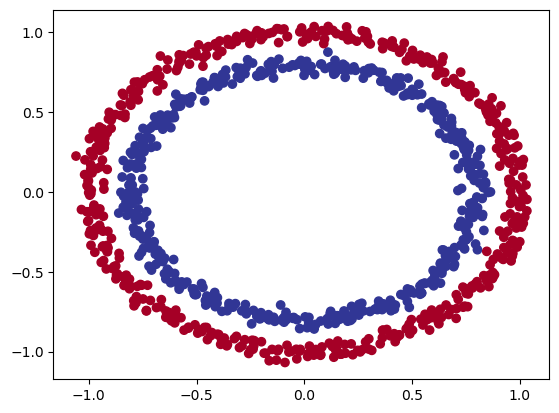

In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

## Input and output shapes

In [8]:
# Check the shape of our features and lebels
X.shape , y.shape

((1000, 2), (1000,))

In [9]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [10]:
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [11]:
# How many samples we're working
len(X) , len(y)

(1000, 1000)

In [12]:
# View the first example of features and lebels
X[0] , y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The step in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate..


In [13]:
# Import TensorFlow
import tensorflow as tf

In [14]:
# Set the ramdom seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)

])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit (X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 14s 3ms/step - loss: 5.8864 - accuracy: 0.4900
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 5.6924 - accuracy: 0.4880
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 5.0950 - accuracy: 0.4970
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 3.2046 - accuracy: 0.5060
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 1.8086 - accuracy: 0.4800


In [15]:
# Let's try and imporve our model by training for longer ...
model_1.fit(X,y,epochs=200,verbose=1)
model_1.evaluate(X,y)

Epoch 1/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7132 - accuracy: 0.4860
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6996 - accuracy: 0.4950
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.4830
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.4790
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4890
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.4960
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4940
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4890
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4870
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4700
Epoch 11/

[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch andd add an extra layer.

In [16]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3.Fit the model
model_2.fit(X , y , epochs=100 , verbose=0)

In [17]:
# 4. Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932913064956665, 0.5]

## Improve our model


Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increse the number of hidden units within a layers.
2. Compiling a model - here we might to choose a different optimization func such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for mor epochs (leave it training for longer).

In [18]:
 # Set te random seed
 tf.random.set_seed(42)

 # 1. Create the model (this time 3 layers)
 model_3 = tf.keras.Sequential([
     tf.keras.layers.Dense(100), # Add 100 dense neurons
     tf.keras.layers.Dense(10), # Add another layer with 10 neurons
     tf.keras.layers.Dense(1)
 ])

 # 2. Compile the model
 model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

 # 3. Fit the model
 model_3.fit(X,y,epochs=100,verbose=0)

In [19]:
# 4. Evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.5070


[0.698448121547699, 0.5070000290870667]

To visualize our model's predictions, let's create a function `plot_decision_boundary()` , this function will ⁉
* Take in a trained model , features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [20]:
import numpy as np

In [21]:
import numpy as np

def plot_decision_boundary(model , X , y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundary of the plot and create a meshgrid
  x_min,x_max = X[:,0].min() - 0.1 , X[:,0].max()+0.1
  y_min,y_max = X[:,1].min() - 0.1 , X[:,1].max()+0.1
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))
  # Create X value (we're going to meke predictions on these)
  x_in = np.c_[xx.ravel(),yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1 :
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx,yy,y_pred, cmap=plt.cm.RdYlBu , alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y , s=40 ,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())



In [22]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

313/313 [==============================] - 0s 968us/step
doing binary classification


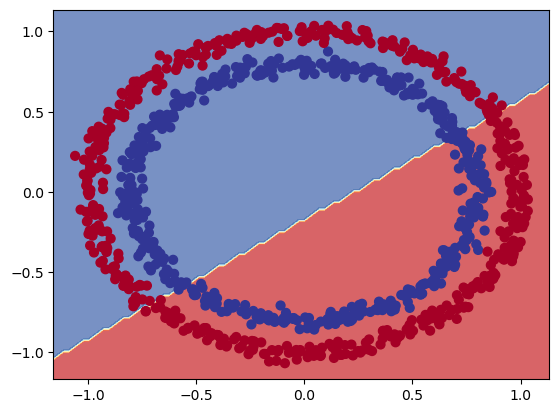

In [23]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [24]:
# Let's see if our model can be used for a regression problem ...
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0,1000,5) 
y_regression = tf.range(100,1100,5) 

X_regression,y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [25]:
 # Split our regression data into training and test sets 
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:0]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:] 
 

In [26]:
x_min,x_max = X[:,0].min() - 0.1 , X[:,0].max() + 0.1
y_min,y_max = X[:,1].min() - 0.1 , X[:,1].max() + 0.1
x_min,x_max,y_min,y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

Oh wait... we compile our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suite our data

In [27]:
# # Setup random seed 
# tf.random.set_seed(42)


# X_reg_train = tf.expand_dims(X_reg_train, axis=-1)

# # 1. Create the model
# model_3 = tf.keras.Sequential ([
#     tf.keras.layers.Dense (100,input_shape=(X_reg_train.shape[1],)) ,
#     tf.keras.layers.Dense(10),
#     tf.keras.layers.Dense(1)
    
# ])

# #2. Compile the model, this time with a regression-specific loss function
# model_3.compile(loss=tf.keras.losses.mae,
#                 optimizer=tf.keras.optimizers.Adam(),
#                 metrics=["mae"])

# # 3. Fit the model
# model_3.fit(X_reg_train,y_reg_train,epochs=100)



# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons
  # After TensorFlow 2.7.0
  tf.keras.layers.Dense(100, input_shape=(1,)), # add 100 dense neurons with input_shape defined 
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['mae'])



In [28]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 202.4350 - mae: 202.4350
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 78.2518 - mae: 78.2518
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 59.4820 - mae: 59.4820
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 62.7698 - mae: 62.7698
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 44.8646 - mae: 44.8646
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 46.4128 - mae: 46.4128
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 44.2449 - mae: 44.2449
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6306 - mae: 43.6306
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.0589 - mae: 43.0589
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.0328 - mae: 42.0328
Epoch 11/100
5/5 [==============================] - 0s 3m

In [29]:
# Make predictions with our trained model 
y_reg_preds = model_3.predict(X_reg_test)

2/2 [==============================] - 0s 2ms/step


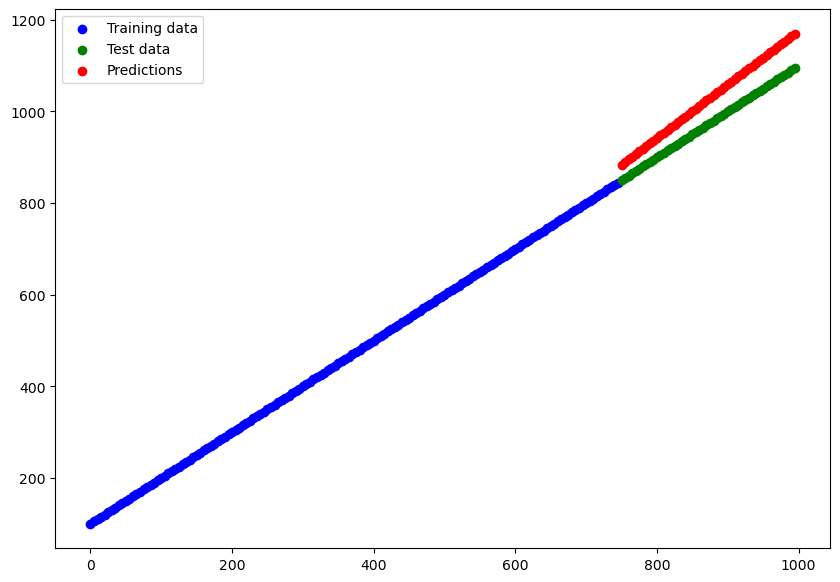

In [30]:


# Plot the model's against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train, c="b" , label="Training data")
plt.scatter(X_reg_test,y_reg_test , c= "g" ,label="Test data")
plt.scatter(X_reg_test,y_reg_preds,c="r" , label="Predictions")
plt.legend()

## The missing piece: Non-linearity

In [31]:
# Set the random seed 
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential ( [
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8495 - accuracy: 0.4770
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8445 - accuracy: 0.4770
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8443 - accuracy: 0.4770
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8440 - accuracy: 0.4770
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8437 - accuracy: 0.4770
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8374 - accuracy: 0.4770
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8330 - accuracy: 0.4770
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8327 - accuracy: 0.4770
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8323 - accuracy: 0.4770
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8320 - accuracy: 0.4770
Epoch 11/

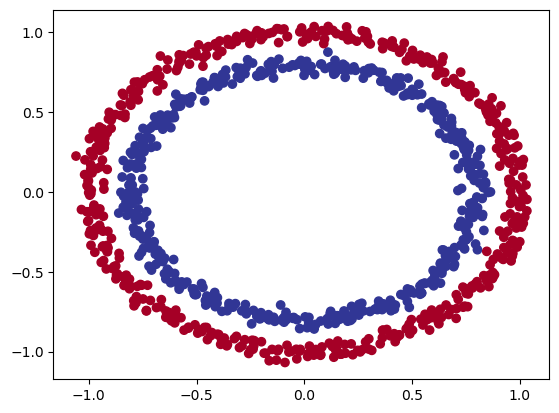

In [32]:
 # Check out our data 
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 872us/step
doing binary classification


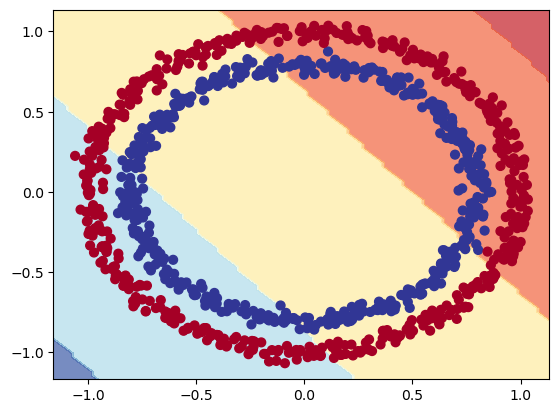

In [33]:
# Check the decision boundary for our lastest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let's try build our first neural network with a non-linear activations dunction

In [34]:
# Set randomseed 
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
])

# 2. Compile the model
model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.3649 - accuracy: 0.4710
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3223 - accuracy: 0.4730
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3126 - accuracy: 0.4720
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2882 - accuracy: 0.4710
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2685 - accuracy: 0.4720
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2519 - accuracy: 0.4710
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2160 - accuracy: 0.4720
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1839 - accuracy: 0.4740
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1781 - accuracy: 0.4750
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1478 - accuracy: 0.4740
Epoch 11/

In [35]:
# Time to replicate the multi-layer neural network from TensorFlow playground

# Set the random seed
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1),
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_6.fit(X , y , epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [36]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 0s 990us/step
doing binary classification


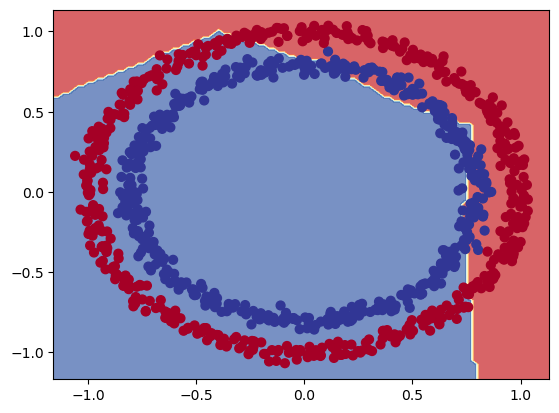

In [37]:
# How do our model predictions look?
plot_decision_boundary(model_6,X,y)

In [38]:
tf.random.set_seed(42)
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6956 - accuracy: 0.5150
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5040
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.5110
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.5110
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6878 - accuracy: 0.5120
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.5130
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.5160
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.5140
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 11/

In [39]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.8740


[0.43047887086868286, 0.8740000128746033]

313/313 [==============================] - 0s 1ms/step
doing binary classification


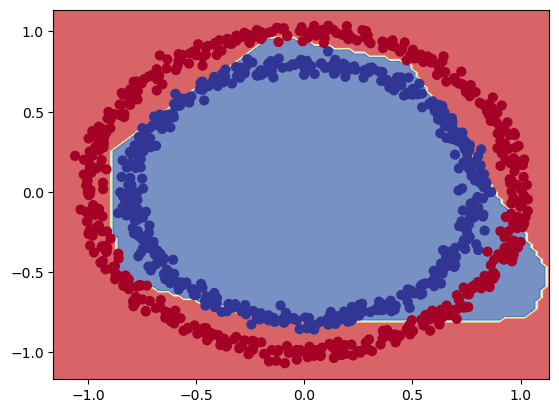

In [40]:
plot_decision_boundary(model_7,X,y)

In [41]:
 # Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

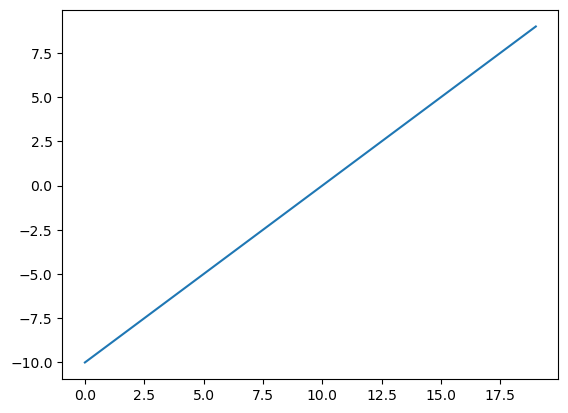

In [42]:
# Visualize our toy tensor
plt.plot(A);

In [43]:
# Let's start by replicating sigmoid = sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid (x) :
    return 1/(1+ tf.exp(-x))

# Use the sigmoid func on your toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

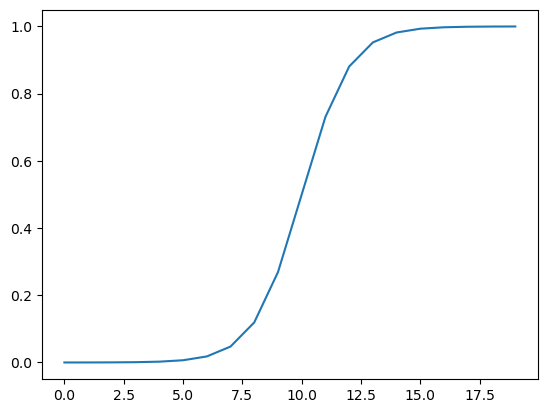

In [44]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [45]:
# Let's recreate the relu function
def relu(x):
    return tf.maximum(0 , x)

# Pass our toy
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

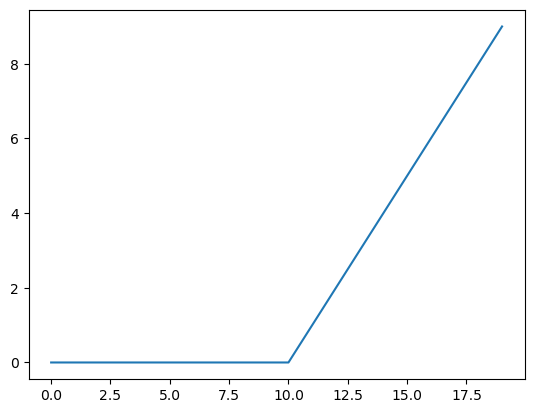

In [46]:
plt.plot(relu(A))

In [47]:
# Let's try linear activation
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

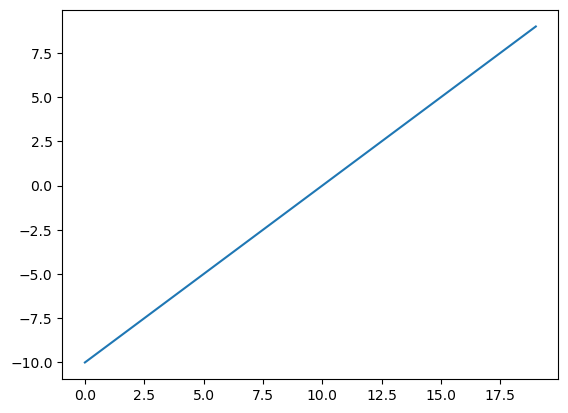

In [48]:
plt.plot(tf.keras.activations.linear(A))

In [49]:
# Does A even same ?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improve our classification

So far we'ev been training and testing on the same dataset....

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [50]:
# Check how many example we have 
len(X)

1000

In [51]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [52]:
# Split ito train and test set
X_train , y_train = X[:800] , y[:800]
X_test , y_test = X[800:] , y[800:]

X_train.shape , X_test.shape , y_train.shape , y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [53]:
# Let's recreate a model to fit on the training data and evaluate on testing data

tf.random.set_seed(42)
model_8 = tf.keras.Sequential ([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_8.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

history = model_8.fit(X_train , y_train , epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6852 - accuracy: 0.5813
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6707 - accuracy: 0.6250
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6578 - accuracy: 0.6725
Epoch 4/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6401 - accuracy: 0.7163
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6162 - accuracy: 0.7125
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5803 - accuracy: 0.7400
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5303 - accuracy: 0.8037
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4875 - accuracy: 0.8300
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4384 - accuracy: 0.8500
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.3843 - accuracy: 0.8963
Epoch 11/25
25/25 [

In [54]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0941 - accuracy: 0.9800


[0.09411194175481796, 0.9800000190734863]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


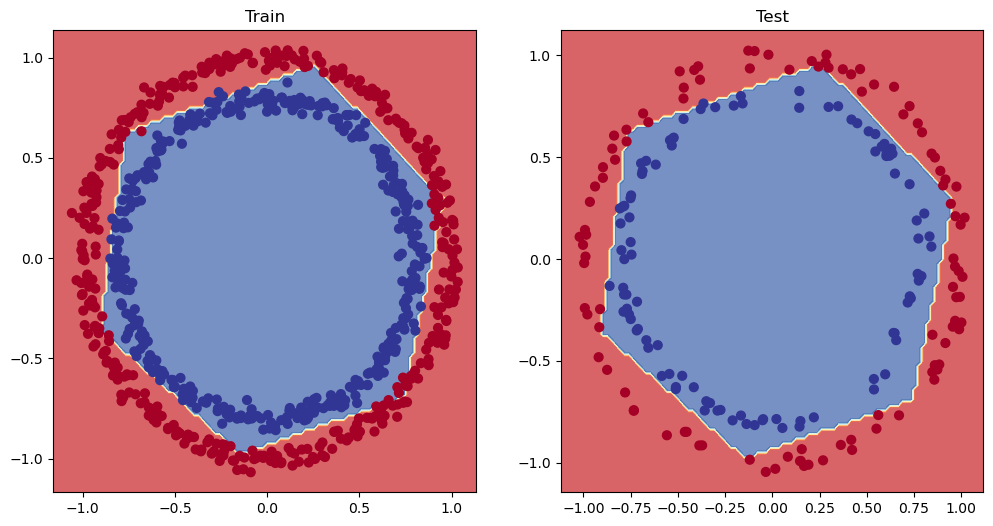

In [55]:
# Plot the decision boundary for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X=X_test,y=y_test)

In [56]:
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 4)                 12        
                                                                 
 dense_18 (Dense)            (None, 4)                 20        
                                                                 
 dense_19 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


## Plot the loss (or training) curve

In [57]:
history.history

{'loss': [0.685230016708374,
  0.6706992983818054,
  0.6577810645103455,
  0.6400930285453796,
  0.6161768436431885,
  0.5802903175354004,
  0.5302517414093018,
  0.48745930194854736,
  0.438442200422287,
  0.38433295488357544,
  0.3370073735713959,
  0.3007470369338989,
  0.2600346505641937,
  0.23534972965717316,
  0.21276965737342834,
  0.18962937593460083,
  0.17434388399124146,
  0.16475185751914978,
  0.14347006380558014,
  0.1348777562379837,
  0.12757724523544312,
  0.1326821893453598,
  0.11925160139799118,
  0.12198910117149353,
  0.1291113644838333],
 'accuracy': [0.581250011920929,
  0.625,
  0.6725000143051147,
  0.7162500023841858,
  0.7124999761581421,
  0.7400000095367432,
  0.8037499785423279,
  0.8299999833106995,
  0.8500000238418579,
  0.8962500095367432,
  0.9162499904632568,
  0.9325000047683716,
  0.9512500166893005,
  0.9537500143051147,
  0.9637500047683716,
  0.9637500047683716,
  0.9599999785423279,
  0.9712499976158142,
  0.9737499952316284,
  0.982500016689

In [58]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.685230,0.58125
1,0.670699,0.62500
2,0.657781,0.67250
3,0.640093,0.71625
4,0.616177,0.71250
5,0.580290,0.74000
6,0.530252,0.80375
7,0.487459,0.83000
8,0.438442,0.85000
9,0.384333,0.89625


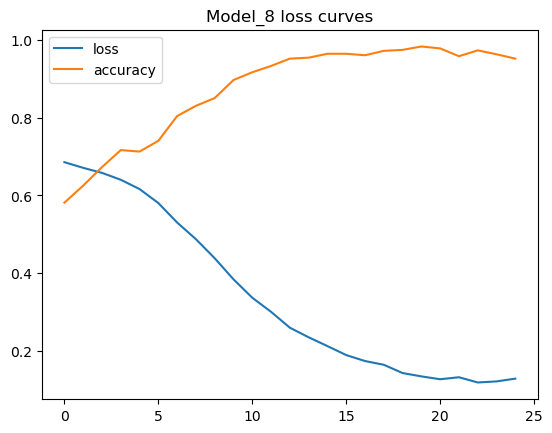

In [59]:
# Plot the loss curves 
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");

## Finding the best learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of funtionality, you can add to your *while* its training
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curve plot.

In [60]:
tf.random.set_seed(42)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_9.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

# Create a learning rate call back
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7186 - accuracy: 0.5163 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7179 - accuracy: 0.5188 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7173 - accuracy: 0.5175 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7165 - accuracy: 0.5175 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7157 - accuracy: 0.5175 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7150 - accuracy: 0.5188 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7141 - accuracy: 0.5200 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7131 - accuracy: 0.5188 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: xlabel='epochs'>

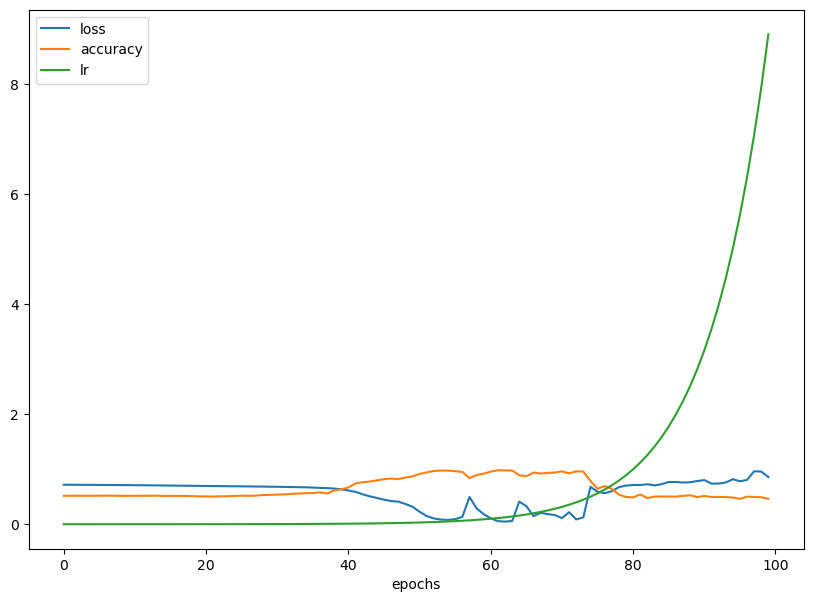

In [61]:
# Checkout the history 
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs")

In [62]:
lrs = 1e-4 * 10**(tf.range(100)/20)
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [63]:
len(lrs)

100

Text(0.5, 1.0, 'Learning rate vs. Loss')

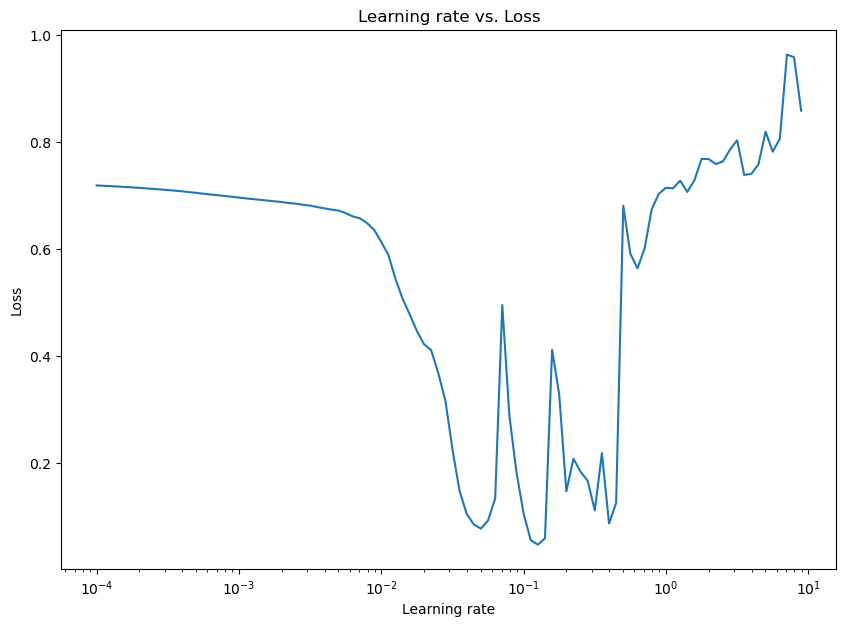

In [64]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [65]:
# Example of other typical learning rates values:
10**0 ,10**-1 , 10**-2 , 10**-3 , 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [66]:
# Let's try using a higher *ideal* learning rate with the same model
tf.random.set_seed(42)
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_10.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.023), loss="binary_crossentropy", metrics=["accuracy"])

# Create a learning rate call back
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_10 = model_10.fit(X_train,
                        y_train,
                        epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 3ms/step - loss: 0.7015 - accuracy: 0.4638
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5088
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6850 - accuracy: 0.5350
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6656 - accuracy: 0.5775
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6356 - accuracy: 0.6363
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5891 - accuracy: 0.7038
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5448 - accuracy: 0.7713
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5127 - accuracy: 0.8025
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4808 - accuracy: 0.8188
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4449 - accuracy: 0.8200
Epoch 11/20
25/25 [

In [67]:
 # Evaluate model 10 on the test dataset
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4112 - accuracy: 0.8150


[0.41119635105133057, 0.8149999976158142]

In [68]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0941 - accuracy: 0.9800


[0.09411194175481796, 0.9800000190734863]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


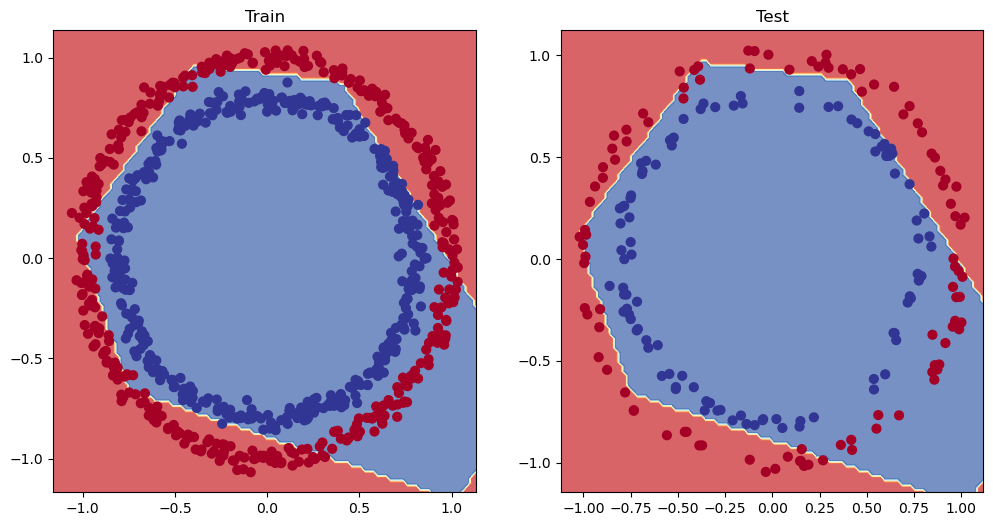

In [69]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,X=X_test,y=y_test)
plt.show()

## More classification evaluation method

Alongside visualizing our models results as much as possible , there are a handful of other classification evaluation nethods & metric you should be familiar with :
- **Accuracy**: This is the simplest evaluation metric. It is the ratio of correct predictions to total predictions. However, it is not a good metric when the classes are imbalanced.
- **Precision**: This is the ratio of true positives to the sum of true positives and false positives
- **Recall**: This is the ratio of true positives to the sum of true positives and false negatives
- **F1-score**: This is the harmonic mean of precision and recall. It is a good metric when the classes are imbalanced.


In [70]:
# Check accuracy of our model
loss, accuracy = model_10.evaluate(X_test,y_test)
print(f"Model loss on the test set : {loss}")
print(f"Model accuracy on the test set : {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.4112 - accuracy: 0.8150
Model loss on the test set : 0.41119635105133057
Model accuracy on the test set : 81.50%


How about confusion metrix

In [71]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions 
y_preds = model_10.predict(X_test)

# Create confusion metrix
# confusion_matrix(y_test,y_preds)

7/7 [==============================] - 0s 1ms/step


Oops.. looks like our predictions array has come out in **prediction probability** form... the standard putput from the sigmoid (or softmax) activation functions.

In [72]:
# Convert predictions probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)>

In [73]:
# Create confusion metrix
confusion_matrix(y_test,tf.round(y_preds))

array([[65, 36],
       [ 1, 98]], dtype=int64)

How about we prettify our confusion metrix ?

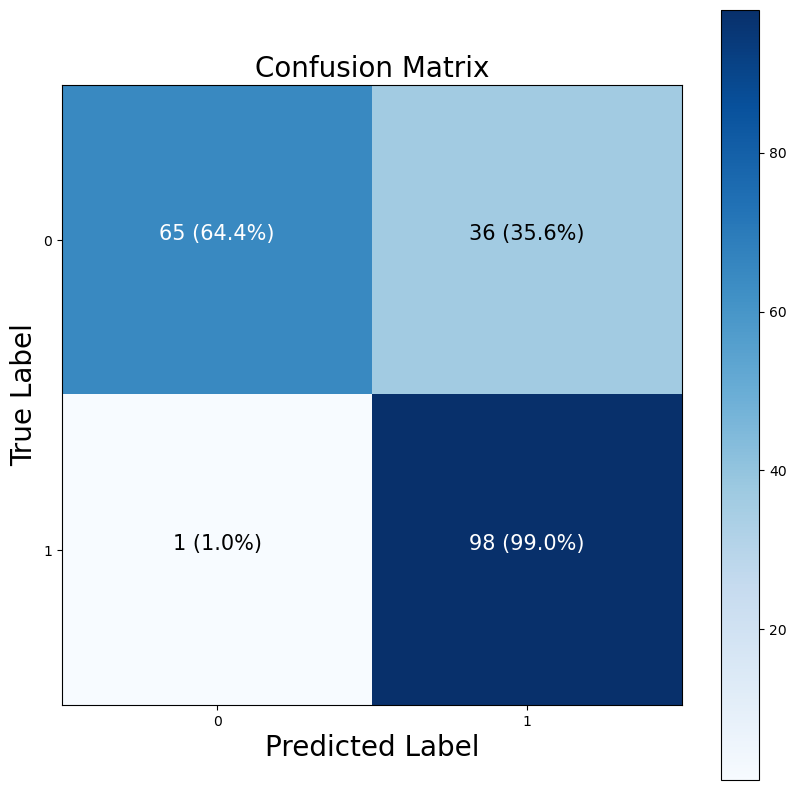

In [74]:
# Note : the confusion metrix we're about to write is a remix of scikit-learn's plot_confusion_metrix 

import itertools

figsize = (10,10)

# Create the confusion metrix
cm = confusion_matrix(y_test,tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # Normalize our confusion metrix
n_classes = cm.shape[0]

# Let's prettify it
fig , ax = plt.subplots(figsize=figsize)
# Create a metrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    labels = classes
else :
    labels = np.arange(cm.shape[0])
    
    # Labels the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted Label",
           ylabel="True Label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)
    
# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)
    
# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell 
for i , j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i , f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i,j] > threshold else "black",
             size=15)

# Working with a larger example (Multiclass classification)

When you have more than two classes as an option, it's known as **multiclass classification**.
* This means is you have 3 differentclasses , it's multiclass classification.
* It also mean if you have 100 different classes, it's multi-class classification.

To pratice multi-class classification, we're going to build a neural network to classify image of different items of clothing.

In [94]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [95]:
# Show the first training example
print(f"Training sample:\n {train_data[0]}")
print(f"Training label:\n {train_labels[0]}")

Training sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [96]:
# Check the shape of a single example
train_data[0].shape , train_labels[0].shape

((28, 28), ())

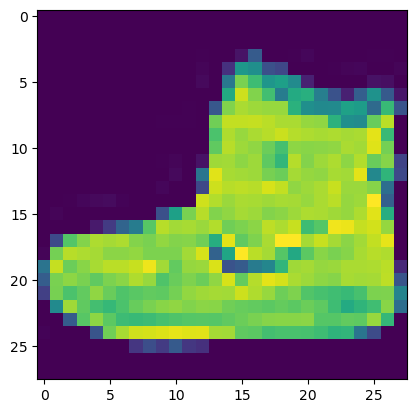

In [97]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [98]:
#Check out sample label
train_labels[0]

9

In [99]:
# Create a small list so we can index onto our training labels so they're human-readable
class_name = ["T-shirt" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag" , "Ankle boot"]

len(class_name)

10

Text(0.5, 1.0, 'Ankle boot')

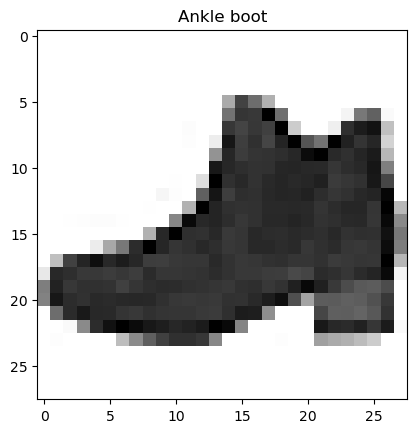

In [100]:
# Plot an example image and its label
index_of_choice = 15
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_name[train_labels[index_of_choice]])

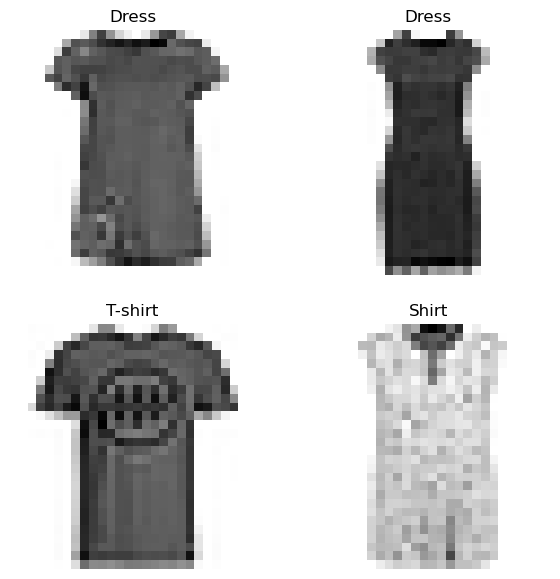

In [101]:
# Plot random
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot (2,2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_name[train_labels[rand_index]])
    plt.axis(False)

## Build a multi-class classification model

For our multi-class model, we can use a similar architecture to our binary classifiers, however , we're going to have to tweak a few things :
* Input shape = 28 x28 (the shape of one image)
* Output shape = 10 (One per class)
* Loss function = tf.keras.losses.CategoricalCrosstentropy()
    * If your label are one-hot encode, use CategoricalCrossentropy if integer form use SparseCategoricalCrossentropy
* Output layer activation = Softmax

In [102]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

non_norm_history = model_11.fit(train_data,
                            tf.one_hot(train_labels,depth=10),
                            epochs=10,
                            validation_data=(test_data,tf.one_hot(test_labels ,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3101 - accuracy: 0.1337 - val_loss: 2.0841 - val_accuracy: 0.2079
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.9112 - accuracy: 0.2240 - val_loss: 1.8181 - val_accuracy: 0.2499
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7644 - accuracy: 0.2366 - val_loss: 1.7233 - val_accuracy: 0.2398
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6927 - accuracy: 0.2498 - val_loss: 1.6826 - val_accuracy: 0.2579
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6295 - accuracy: 0.2917 - val_loss: 1.6183 - val_accuracy: 0.3537
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5793 - accuracy: 0.3406 - val_loss: 1.5883 - val_accuracy: 0.3564
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4755 - accuracy: 0.3944 - val_loss: 1.3869 - val_accuracy:

In [103]:
# Check the model summary
model_11.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 4)                 3140      
                                                                 
 dense_39 (Dense)            (None, 4)                 20        
                                                                 
 dense_40 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [104]:
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this mean they like to have the number between 0 to 1.

In [105]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check min and max from norm
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [113]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

norm_history = model_12.fit(train_data_norm,
                           train_labels,
                            epochs=10,
                            validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0527 - accuracy: 0.6089 - val_loss: 0.7242 - val_accuracy: 0.7466
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6664 - accuracy: 0.7728 - val_loss: 0.6452 - val_accuracy: 0.7786
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6026 - accuracy: 0.7951 - val_loss: 0.6025 - val_accuracy: 0.7940
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5701 - accuracy: 0.8038 - val_loss: 0.5934 - val_accuracy: 0.7929
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5522 - accuracy: 0.8082 - val_loss: 0.5987 - val_accuracy: 0.7882
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5387 - accuracy: 0.8118 - val_loss: 0.5626 - val_accuracy: 0.8064
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5293 - accuracy: 0.8167 - val_loss: 0.5721 - val_accuracy:

<Axes: title={'center': 'Normalized data'}>

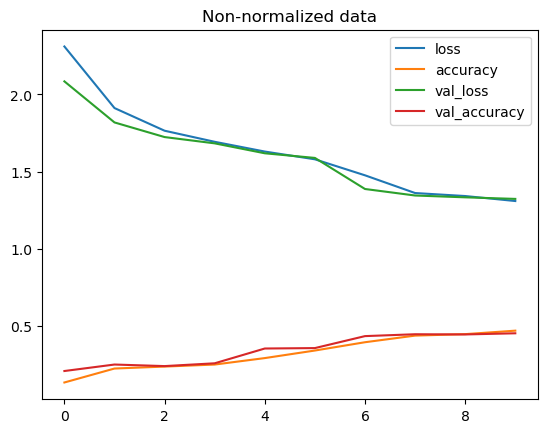

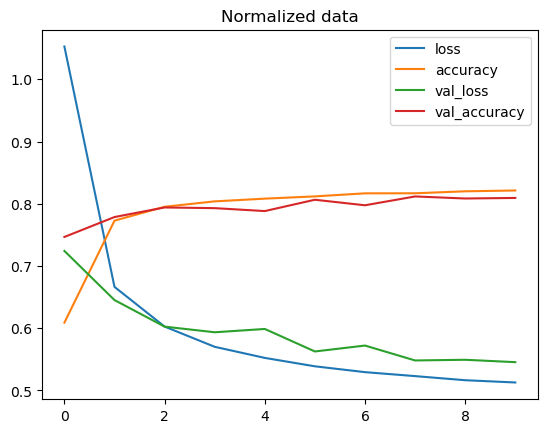

In [114]:
import pandas as pd
# Plot non-norm data loss curve
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot norm data loss curve
pd.DataFrame(norm_history.history).plot(title="Normalized data")

## Finding the ideal learning rate

In [134]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20) )

find_lr_history = model_13.fit(train_data_norm,
                           train_labels,
                            epochs=40,
                            validation_data=(test_data_norm,test_labels),
                            callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1936 - accuracy: 0.5612 - val_loss: 0.8113 - val_accuracy: 0.7115 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6892 - accuracy: 0.7615 - val_loss: 0.6639 - val_accuracy: 0.7726 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6132 - accuracy: 0.7890 - val_loss: 0.6468 - val_accuracy: 0.7778 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5942 - accuracy: 0.7955 - val_loss: 0.6275 - val_accuracy: 0.7870 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5841 - accuracy: 0.7983 - val_loss: 0.6339 - val_accuracy: 0.7845 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5771 - accuracy: 0.8018 - val_loss: 0.6348 - val_accuracy: 0.7811 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding the idel learningrate')

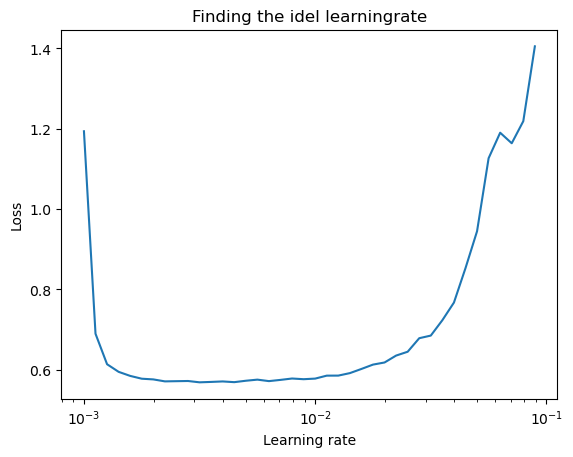

In [135]:
# Plot learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * 10**(tf.range(40)/20)
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the idel learningrate")


In [137]:
# Let's refit a model with the ideal learning rate 
tf.random.set_seed(42)

model_14 =tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['accuracy'])

# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20) )

find_lr_history = model_14.fit(train_data_norm,
                           train_labels,
                            epochs=20,
                            validation_data=(test_data_norm,test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0446 - accuracy: 0.6017 - val_loss: 0.7235 - val_accuracy: 0.7460
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6408 - accuracy: 0.7768 - val_loss: 0.6160 - val_accuracy: 0.7850
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5697 - accuracy: 0.8051 - val_loss: 0.5792 - val_accuracy: 0.7989
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5414 - accuracy: 0.8142 - val_loss: 0.5590 - val_accuracy: 0.8070
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5274 - accuracy: 0.8185 - val_loss: 0.5595 - val_accuracy: 0.8080
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5163 - accuracy: 0.8218 - val_loss: 0.5492 - val_accuracy: 0.8094
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5102 - accuracy: 0.8244 - val_loss: 0.5412 - val_accuracy:

## Evaluate our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metric (such as a confusion matrix)
* Asses some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top 2..

In [167]:
# Note : the confusion metrix we're about to write is a remix of scikit-learn's plot_confusion_metrix 

import itertools 
from sklearn.metrics import confusion_matrix


def make_confusion_metrix(y_true , y_pred , classes=None , figsize= (10,10) , text_size = 15 ):

    # Create the confusion metrix
    cm = confusion_matrix(y_true,y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # Normalize our confusion metrix
    n_classes = cm.shape[0]

    # Let's prettify it
    fig , ax = plt.subplots(figsize=figsize)
    # Create a metrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    if classes:
        labels = classes
    else :
        labels = np.arange(cm.shape[0])
        
        # Labels the axes
    ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)
        
    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)
        
    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell 
    for i , j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i , f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i,j] > threshold else "black",
                size=text_size)



In [ ]:
# import itertools 
# from sklearn.metrics import confusion_matrix


# def make_confusion_metrix(y_true , y_pred , classes=None , figsize= (10,10) , text_size = 15 ):
#     cm = confusion_matrix(y_true, y_pred)
#     cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
#     n_classes = cm.shape[0] # find the number of classes we're dealing with

#     # Plot the figure and make it pretty
#     fig, ax = plt.subplots(figsize=figsize)
#     cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
#     fig.colorbar(cax)

#     # Are there a list of classes?
#     if classes:
#         labels = classes
#     else:
#         labels = np.arange(cm.shape[0])

#     # Label the axes
#     ax.set(title="Confusion Matrix",
#             xlabel="Predicted label",
#             ylabel="True label",
#             xticks=np.arange(n_classes), # create enough axis slots for each class
#             yticks=np.arange(n_classes),
#             xticklabels=labels, # axes will labeled with class names (if they exist) or ints
#             yticklabels=labels)

#     # Make x-axis labels appear on bottom
#     ax.xaxis.set_label_position("bottom")
#     ax.xaxis.tick_bottom()

#     # Set the threshold for different colors
#     threshold = (cm.max() + cm.min()) / 2.

#     # Plot the text on each cell
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
#                 horizontalalignment="center",
#                 color="white" if cm[i, j] > threshold else "black",
#                 size=text_size)

In [158]:
class_name

['T-shirt',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [142]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) 

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 3ms/step


array([[6.7772836e-09, 6.9741877e-19, 2.3159359e-12, 4.4309725e-09,
        1.7743693e-12, 3.5284799e-01, 2.1241162e-08, 9.1132030e-02,
        4.9874772e-05, 5.5597007e-01],
       [1.5313261e-02, 4.4426685e-03, 6.6143954e-01, 5.5227219e-03,
        1.4241976e-01, 3.3101617e-07, 1.7003511e-01, 1.9283204e-08,
        8.2653417e-04, 6.2211685e-16],
       [1.0530449e-06, 9.9979955e-01, 2.9144794e-06, 1.6838721e-04,
        2.8099590e-05, 0.0000000e+00, 8.3879506e-08, 4.1789337e-36,
        1.1424709e-12, 0.0000000e+00],
       [6.9362540e-07, 9.9811894e-01, 2.0238331e-05, 1.8478881e-03,
        1.2066226e-05, 0.0000000e+00, 4.5565805e-08, 2.0746569e-29,
        5.4452932e-11, 0.0000000e+00],
       [1.7366923e-01, 2.1498033e-03, 1.3730234e-01, 2.8526671e-02,
        4.9170628e-02, 8.5299225e-06, 6.0549730e-01, 5.5345154e-08,
        3.6754592e-03, 7.1726930e-12]], dtype=float32)

In [140]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [150]:
tf.argmax(y_probs[0]) 

<tf.Tensor: shape=(), dtype=int64, numpy=9>

In [151]:
y_probs[0] ,class_name[tf.argmax(y_probs[0])]

(array([6.7772836e-09, 6.9741877e-19, 2.3159359e-12, 4.4309725e-09,
        1.7743693e-12, 3.5284799e-01, 2.1241162e-08, 9.1132030e-02,
        4.9874772e-05, 5.5597007e-01], dtype=float32),
 'Ankle boot')

In [152]:
# Convert all of the prediction probabilities into integer
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds [:10]


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [153]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[753,   7,  15,  68,  12,   3, 133,   0,   9,   0],
       [  1, 946,  13,  33,   3,   0,   3,   1,   0,   0],
       [ 15,   4, 669,  12, 208,   0,  86,   0,   6,   0],
       [ 31,  10,  22, 841,  51,   0,  37,   0,   8,   0],
       [  0,   3,  89,  26, 808,   0,  71,   0,   3,   0],
       [  0,   0,   0,   1,   0, 911,   4,  42,   7,  35],
       [158,   2, 110,  44, 176,   3, 491,   0,  16,   0],
       [  0,   0,   0,   0,   0,  37,   0, 945,   1,  17],
       [  0,   1,   2,  17,  15,   9,  44,   4, 908,   0],
       [  0,   0,   0,   0,   0,  41,   0,  74,   0, 885]], dtype=int64)

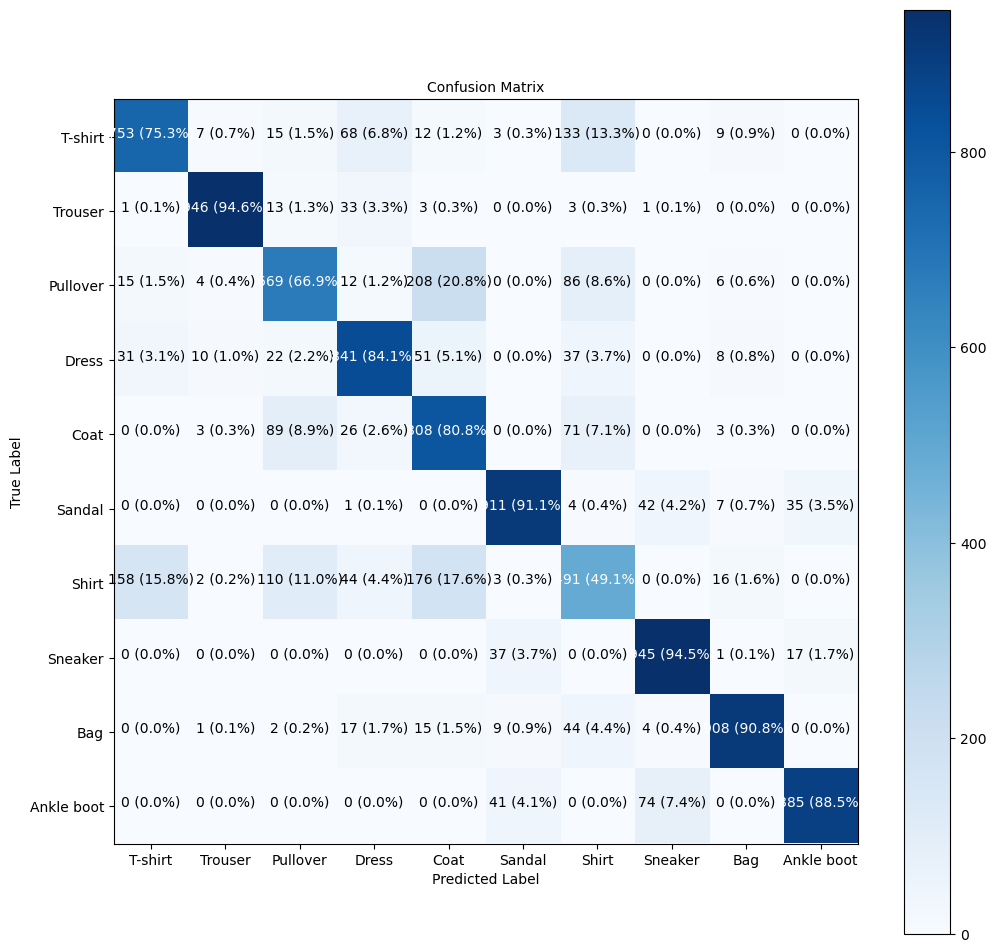

In [168]:
# Make a prettier confusion metrix
make_confusion_metrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_name,
                      figsize=(12,12),
                      text_size=10)

> ** Note: ** Often when working with image and other forms of visual data , it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and output of your models.

How about we create a fun little function for :
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the prediction label

In [193]:
import random

def plot_random_image(model , images , true_labels , classes):
    """
    Pick a random image, plots it and labels it with a prediction and truth label.
    """"Deep Learning and TensorFlow Fundamentals.ipynb"
    
    # Set a random integer
    i = random.randint(0,len(images))
    
    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1,28,28))
    pred_label = classes[pred_probs.argmax()]
    true_labels = classes[true_labels[i]]
    
    # Plot the image
    plt.imshow(target_image , cmap=plt.cm.binary)
    
    # Change the color of the titles depend on it it correct or not!!
    if pred_label == true_labels:
        color = "green"
    else:
        color = "red"
        
    # Add xlabel info 
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                     100*tf.reduce_max(pred_probs),
                                                     true_labels),
               color=color)
    

1/1 [==============================] - 0s 22ms/step


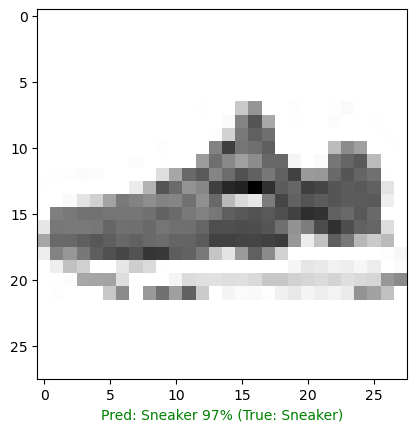

In [229]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_name)

## What pattern is our model learning?

In [230]:
# Find the layers of our recent model
model_14.layers

In [231]:
# Extrack a particular layer
model_14.layers[1]

In [232]:
# Het the patterns of a layer in our network
weight , biases = model_14.layers[1].get_weights()

In [233]:
weight , weight.shape

(array([[-0.17623985, -0.04675278,  0.4965441 ,  0.89380753],
        [-0.2947848 , -0.9411966 , -0.19170403,  0.36476946],
        [-0.86154425,  0.13598965, -0.88911235, -0.2472754 ],
        ...,
        [-0.4159029 ,  0.05761299,  0.23790713, -0.773333  ],
        [-0.3611284 , -0.0260765 , -0.15939116, -1.1780486 ],
        [-0.41331494,  0.22796291, -0.22482656, -0.31438652]],
       dtype=float32),
 (784, 4))

In [234]:
28 * 28

784

In [235]:
model_14.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 784)               0         
                                                                 
 dense_92 (Dense)            (None, 4)                 3140      
                                                                 
 dense_93 (Dense)            (None, 4)                 20        
                                                                 
 dense_94 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now let's check out the bias vector...

In [236]:
# Bias and biases shapes
biases , biases.shape

(array([1.6704993, 0.7276234, 0.5800104, 0.8983275], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weight matrix.

The bias vector get initialized as zero (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights should influence the next layer.

In [237]:
model_14.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 784)               0         
                                                                 
 dense_92 (Dense)            (None, 4)                 3140      
                                                                 
 dense_93 (Dense)            (None, 4)                 20        
                                                                 
 dense_94 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


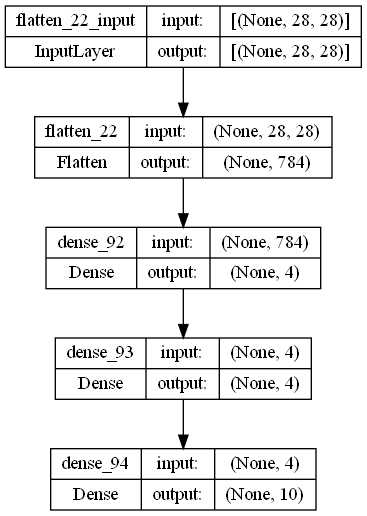

In [240]:
# Let's checkout another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)